# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import os
import ast

import matplotlib.pyplot as plt
import seaborn as sns

import re, string
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk.corpus import words
from langdetect import detect
nltk.download("words")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package words to /home/joeymeyer/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/joeymeyer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joeymeyer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#sonia's machine
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-11-14 21:49:29.402103: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 21:49:29.402127: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 21:49:29.402151: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 21:49:29.408355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


2023-11-14 21:49:32.004558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 21:49:32.004735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-14 21:49:32.066687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Load Combined Data

In [4]:
%cd /media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output/
%ls

/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output
combined_df.pkl*                    final_topic_results.pkl*
conversational/                     final_topic_visualization.png*
final_bertopic_model.pkl*           travel_conversations.pkl*
final_heatmap_visualization.png*    travel_conversations_sample.pkl*
final_hierarchy_visualization.png*  travel_QA/
final_processed_with_topic.csv*     travel_QA.pkl*


/media/joeymeyer/970-evo-plus/Sonia/bertproj/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [108]:
output_dir = '/media/joeymeyer/970-evo-plus/Sonia/bertproj/data_viz'
combined_path = '/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output'

In [6]:
%cd /media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output/
conv = joblib.load('travel_conversations.pkl')
qa = joblib.load('travel_QA.pkl')

/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output


In [6]:
conv = conv[conv['source'] != 'dolly']
conv.shape

(39941, 6)

# TF-IDF & TSNE

## conversation

In [ ]:
# categories = [conv['cause_clean'], qa['cause_clean']]

In [55]:
conv_samp = conv[['source', 'bert_summary']]

In [56]:
conv_samp = conv_samp.sample(n=4000)

In [57]:
conv_samp.shape

(4000, 2)

In [59]:
qa.shape

(4434, 6)

In [60]:
qa_samp = qa[['source', 'bert_summary']]
qa_samp = qa_samp.sample(n=4000)
qa_samp.shape

(4000, 2)

In [61]:
comb_samp = pd.concat([conv_samp, qa_samp], axis=0)
comb_samp = comb_samp.reset_index(drop=True)
comb_samp.head()

,source,bert_summary
0,ultrachat,a activity know ride and this be experience qu...
1,ultrachat,2 tour reykjavik to all what modern this to bi...
2,ultrachat,be trail many coaster be orlando friendly muse...
3,ultrachat,accessibility promote local government recover...
4,ultrachat,this boat 2 electric language world beauty tee...


In [65]:
#top 1000 by term frequency
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(comb_samp['bert_summary'])

In [66]:
denselist = X.todense().tolist()
df = pd.DataFrame(denselist, columns=vectorizer.get_feature_names_out())

In [67]:
df

,00,000,10,100,11,12,13,14,15,16,...,yourself,youtube,zealand,zip,zone,zoo,är,και,να,το
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.187212,0.0,0.0,0.0,0.0,0.0


In [70]:
tf_idf = pd.concat([pd.Series(comb_samp['bert_summary'], name='bert_summary'), df], axis=1)
tf_idf = pd.concat([pd.Series(comb_samp['source'], name='Source'), tf_idf], axis=1)

In [71]:
tf_idf.head()

,Source,bert_summary,00,000,10,100,11,12,13,14,...,yourself,youtube,zealand,zip,zone,zoo,är,και,να,το
0,ultrachat,a activity know ride and this be experience qu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ultrachat,2 tour reykjavik to all what modern this to bi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ultrachat,be trail many coaster be orlando friendly muse...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ultrachat,accessibility promote local government recover...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ultrachat,this boat 2 electric language world beauty tee...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
tf_idf.describe()

,00,000,10,100,11,12,13,14,15,16,...,yourself,youtube,zealand,zip,zone,zoo,är,και,να,το
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.001232,0.001870,0.005238,0.002175,0.002452,0.001900,0.001083,0.001475,0.001926,0.001074,...,0.002351,0.001401,0.001148,0.001076,0.000867,0.001319,0.001081,0.000958,0.001112,0.000741
std,0.018672,0.017803,0.025588,0.018173,0.023234,0.018073,0.013639,0.016775,0.018096,0.013905,...,0.018354,0.019130,0.018650,0.015258,0.014561,0.021604,0.019529,0.024373,0.028136,0.019766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.630055,0.453508,0.367346,0.452576,0.871536,0.483509,0.471917,0.519764,0.672877,0.350246,...,0.307089,0.561142,0.788753,0.640200,0.634920,0.815908,0.652681,0.930845,0.888455,0.752795


In [73]:
#export tf idf feature data
tf_idf.to_csv(f'{output_dir}/comb_tfidf.csv',index=False)

In [74]:
from sklearn.manifold import TSNE
from matplotlib.patches import Patch
import matplotlib.cm as cm

In [78]:
# tf_idf['Source'].unique()

array(['ultrachat', 'dolly', 'reddit'], dtype=object)

In [83]:
# # Define a custom function to map 'Conversational' to 0 and 'qa' to 1
# def map_category(category):
#     if category == 'ultrachat':
#         return 0
#     elif category == 'dolly':
#         return 1
#     elif category == 'reddit':
#         return 2

# # Apply the custom function to create the 'new_column'
# tf_idf['Source_num'] = tf_idf['Source'].apply(map_category)

In [85]:
# travel_tfidf = tf_idf.groupby('Source_num')

In [88]:
# #creates dict of pd series with top 200 most frequent words by news category
# top_n = 200
# freq_by_cat = {}
# travel_categories = []
# for name, group in travel_tfidf:
#     travel_categories.append(name)
#     freq_by_cat[name] = travel_tfidf.get_group(name).sum().drop('Source_num').astype(int).nlargest(n = top_n)

ValueError: invalid literal for int() with base 10: 'ultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatultrachatu

In [87]:
# freq_by_cat

{}

In [ ]:
# #title dimension for pyplot
# title_dic = {'fontsize': 250,
#  'fontweight' : 5,
#  'verticalalignment': 'baseline',
#  'horizontalalignment': 'center'}

In [105]:
#sample 12000 for tsne
# sample = tf_idf.sample(n=12000)
transform_me = tf_idf.drop(['Source','Source_num','bert_summary'], axis=1)

In [106]:
transform_me = transform_me.iloc[:, :-4] #drop diff language
transform_me = transform_me.iloc[:, 28:] #drop numbers
transform_me.head()

,ability,able,about,above,abroad,absolutely,accept,access,accessible,accommodation,...,youll,young,your,youre,yourself,youtube,zealand,zip,zone,zoo
0,0.0,0.0,0.074387,0.0,0.0,0.0,0.0,0.12552,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#fit tsne model on sample data
tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32, verbose = 1)
t = tsne_model.fit_transform(transform_me)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.205s...
[t-SNE] Computed neighbors for 8000 samples in 2.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.171965
[t-SNE] KL divergence after 250 iterations with early exaggeration: 157.018356
[t-SNE] KL divergence after 900 iterations: 5.361341


In [100]:
#title dimension for pyplot
title_dic_tsne = {'fontsize': 50,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

In [112]:
tf_idf['Source']

0       ultrachat
1       ultrachat
2       ultrachat
3       ultrachat
4       ultrachat
          ...    
7995       reddit
7996       reddit
7997       reddit
7998       reddit
7999       reddit
Name: Source, Length: 8000, dtype: object

In [111]:
pd.Categorical(tf_idf['Source']).codes

# 1 reddit
# 2 ultrachat
# 3 dolly

array([2, 2, 2, ..., 1, 1, 1], dtype=int8)

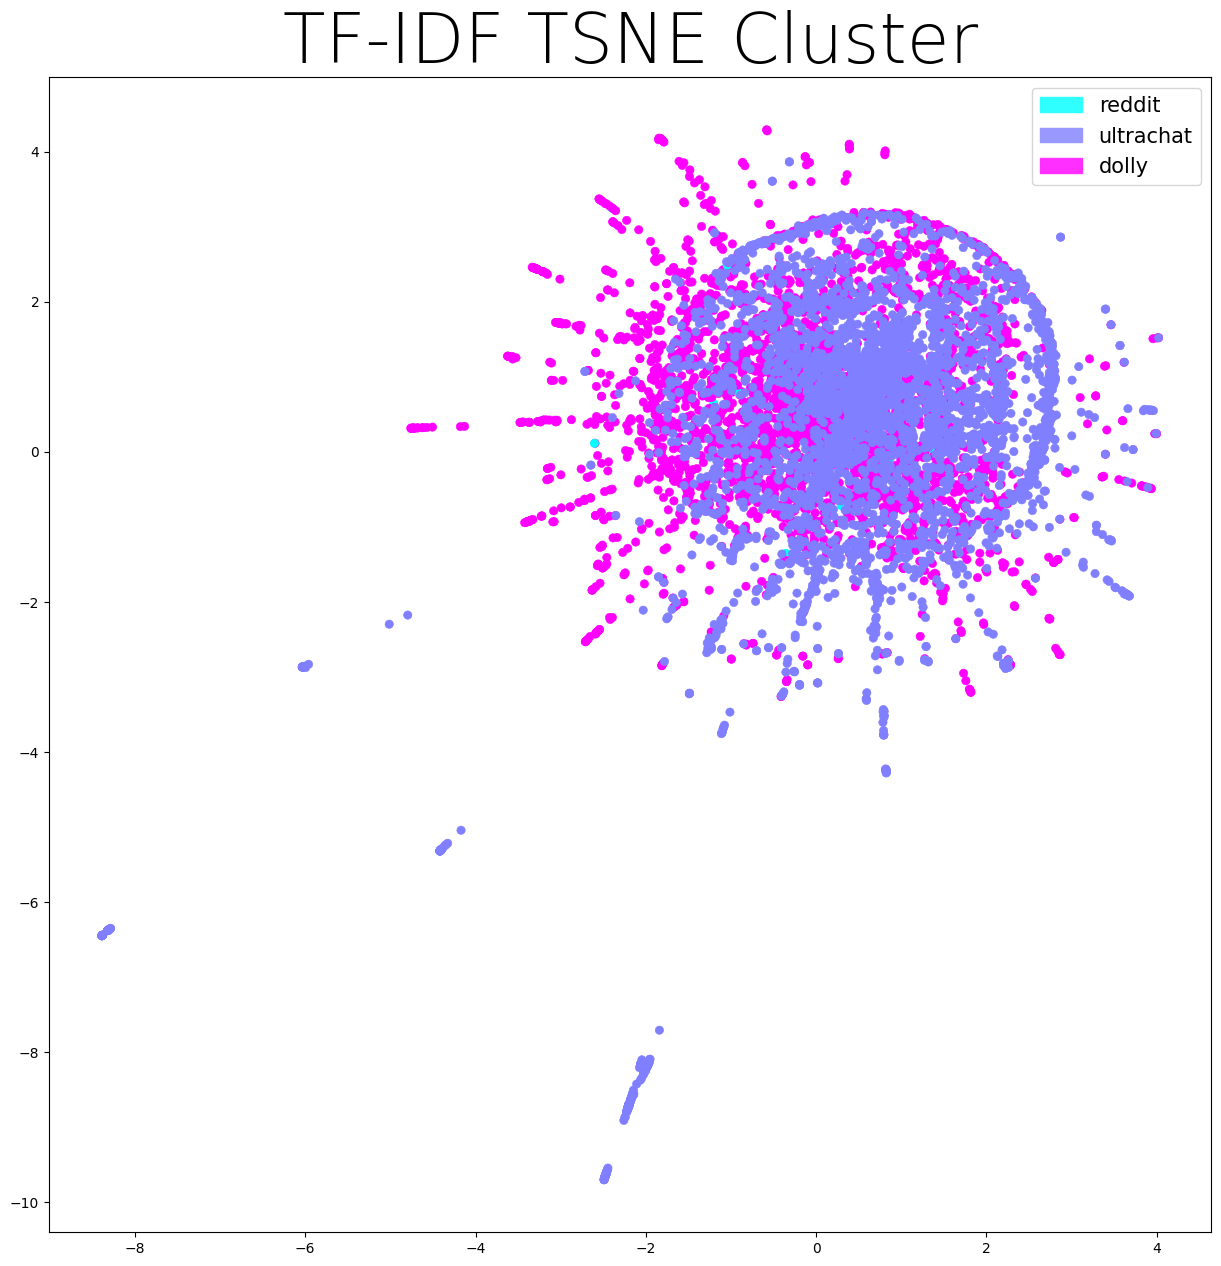

In [113]:
cat_colors = pd.Categorical(tf_idf['Source']).codes
sc = plt.scatter(t[:,0], t[:,1], c=cat_colors, cmap=cm.cool, linewidths=0.4)
# snt_patch = Patch(color='#54AAFC', label='science_and_technology')
business_patch = Patch(color='#30ffff', label='reddit')
sports_patch = Patch(color='#9898FF', label='ultrachat')
world_patch = Patch(color='#ff30ff', label='dolly')
plt.legend(handles=[business_patch, sports_patch, world_patch], fontsize = 15)
plt.gcf().set_size_inches((15, 15))
plt.title('TF-IDF TSNE Cluster', fontdict = title_dic_tsne)
plt.savefig(f'{output_dir}/tfidf_tsne', bbox_inches='tight')
plt.show